In [5]:
import os.path as path
import h5py
import os
import gc
import numpy as np

from bunch import Bunch

cdir = '..'


config = {
    "activation": "prelu", 
    "batch_size": 2, 
    "data_format": "NCHW", 
    "dir": "ON_RSideNoOrg", 
    "is_training": 1, 
    "learning_rate": 0.0001, 
    "max_to_keep": 1, 
    "num_epochs": 108, 
    "num_iter_per_epoch": 64, 
    "pooling": "max", "run": 1, 
    "state_size": [256, 256, 1], 
    "version": 1, 
    "exp_name": "ON_RSideNoOrg-Ultrasonic-ImageSize256-Epoch108-Iter64-LR0.0001-BS2-prelu-max-1"
}

config = Bunch(config)

img_size = config.state_size[0]
source_dir = 'dataset/' + config.dir

data_format = 'NCHW'
expanded_dim = 1 if data_format == 'NCHW' else -1

print('[INFO] :: Reading data from ->', source_dir)
# load train and test set and we split 1/10 of the train set to be the validation set
switch_dim = lambda x: np.rollaxis(x, -1, -2)

files = [_ for _ in os.listdir('../' + source_dir) if _[-3:] == 'mat']

img_ = []
mask_ = []
for f_idx, fname in enumerate(files):
    print(fname)
    data_dir = fname.split('.')[0]
    data_name = fname.split('.')[0]
    with h5py.File(path.join('../', source_dir, fname), 'r') as file:
        keys = list((file[data_name]['train']))
        m = np.array(file[data_name]['train']['img']).shape[0]
        idx = np.random.choice(m, m // 10)
        
        # process images
        img = np.array(file[data_name]['train']['img'])[idx]
        img = switch_dim(img)
        img_.append(img)
        print(img.shape)
        lumen = np.array(file[data_name]['train']['lumen'])[idx]
        lumen = switch_dim(lumen).astype(np.uint8)
        media = np.array(file[data_name]['train']['media'])[idx]
        media = switch_dim(media).astype(np.uint8)
        mask_.append(lumen + media)
        print(lumen.shape, media.shape)
        
        del img
        del lumen
        del media
        gc.collect()
        
inpt = np.expand_dims(np.vstack(img_), expanded_dim).astype(np.float32) / 255
del img_
gc.collect()
y = np.vstack(mask_)
del mask_
gc.collect()

[INFO] :: Reading data from -> dataset/ON_RSideNoOrg
ON_RSideNoOrg_2.mat
(287, 256, 256)
(287, 512, 512) (287, 512, 512)
ON_RSideNoOrg_3.mat
(287, 256, 256)
(287, 512, 512) (287, 512, 512)
ON_RSideNoOrg_1.mat
(287, 256, 256)
(287, 512, 512) (287, 512, 512)


0

In [6]:
print(inpt.shape)

(861, 1, 256, 256)


In [7]:
print(y.shape)

(861, 512, 512)


In [9]:
import matplotlib.pyplot as plt


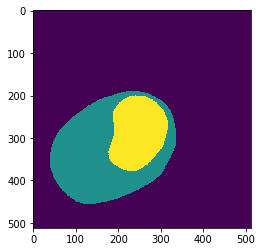

In [12]:
plt.imshow(y[0])

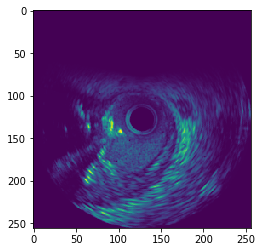

In [14]:
plt.imshow(inpt[0].reshape(256, 256))

In [ ]:

# self.input = np.expand_dims(np.vstack(img_), expanded_dim).astype(np.float32) / 255
# del img_
# gc.collect()
# self.y = np.vstack(mask_)
# del mask_
# gc.collect()

# val_size = -1
# val_size = int(self.input.shape[0] // 10 * 9)

# self.val_input = self.input[val_size:]
# self.val_y = self.y[val_size:]
# self.input = self.input[:val_size]
# self.y = self.y[:val_size]
# self.test_input = np.expand_dims(
#     np.load(
#         path.join(
#             path.abspath(cdir), source_dir, 'img.npy')), expanded_dim).astype(np.float32) / 255
# self.test_y = np.load(
#     path.join(
#         path.abspath(cdir), source_dir,
#         target+'.npy')).astype(np.uint8)

# print('[INFO] :: Data loaded...\nDatasets are splited to\n')
# print('Training...')
# print(self.input.shape)
# print(self.y.shape)
# # print('Validation...')
# # print(self.val_input.shape)
# # print(self.val_y.shape)
# print('Testing...')
# print(self.test_input.shape)
# print(self.test_y.shape)

#     def next_batch(self, batch_size=10):
#         idx = np.random.choice(self.input.shape[0], batch_size, replace=False)
#         return self.input[idx], self.y[idx]

#     def get_test_subsets(self, subset_size):
#         test_set_size = self.test_input.shape[0]
#         test_subsets = [(self.test_input[i:i + subset_size],
#                          self.test_y[i:i + subset_size])
#                         for i in range(0, test_set_size, subset_size)]
#         return test_subsets
